In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import re
from matplotlib import pyplot as plt

In [2]:
import random

In [1]:
import pyiptmnet.api as api

In [3]:
a = api.get_ptm_dependent_ppi("P04637", dict=True)

In [4]:
a

[{'ptm_type': 'Phosphorylation',
  'substrate': {'uniprot_id': 'P16403', 'name': 'HIST1H1C'},
  'site': 'T146',
  'interactant': {'uniprot_id': 'P04637', 'name': 'TP53'},
  'association_type': 'association',
  'source': {'name': 'eFIP',
   'label': 'efip',
   'url': 'http://research.bioinformatics.udel.edu/eFIPonline/index.php'},
  'pmid': '22249259'},
 {'ptm_type': 'Phosphorylation',
  'substrate': {'uniprot_id': 'Q9Y5J3', 'name': 'HEY1'},
  'site': 'S68',
  'interactant': {'uniprot_id': 'P04637', 'name': 'TP53'},
  'association_type': 'increased_association',
  'source': {'name': 'eFIP',
   'label': 'efip',
   'url': 'http://research.bioinformatics.udel.edu/eFIPonline/index.php'},
  'pmid': '27129302'},
 {'ptm_type': 'Phosphorylation',
  'substrate': {'uniprot_id': 'P04637', 'name': 'TP53'},
  'site': 'S15',
  'interactant': {'uniprot_id': 'P23804', 'name': 'Mdm2'},
  'association_type': 'association',
  'source': {'name': 'eFIP',
   'label': 'efip',
   'url': 'http://research.bioinf

In [16]:
a2 = [i for i in a if i['substrate']['name'] =="TP53"]

In [17]:
len(a2)

59

In [19]:
a3 = [i for i in a2 if i['site'] == 'S20']

In [25]:
a3

[{'ptm_type': 'Phosphorylation',
  'substrate': {'uniprot_id': 'P04637', 'name': 'TP53'},
  'site': 'S20',
  'interactant': {'uniprot_id': 'Q00987', 'name': 'MDM2'},
  'association_type': 'association',
  'source': {'name': 'eFIP',
   'label': 'efip',
   'url': 'http://research.bioinformatics.udel.edu/eFIPonline/index.php'},
  'pmid': '11583595'},
 {'ptm_type': 'Phosphorylation',
  'substrate': {'uniprot_id': 'P04637', 'name': 'TP53'},
  'site': 'S20',
  'interactant': {'uniprot_id': 'Q00987', 'name': 'MDM2'},
  'association_type': 'association',
  'source': {'name': 'eFIP',
   'label': 'efip',
   'url': 'http://research.bioinformatics.udel.edu/eFIPonline/index.php'},
  'pmid': '16313886'},
 {'ptm_type': 'Phosphorylation',
  'substrate': {'uniprot_id': 'P04637', 'name': 'TP53'},
  'site': 'S20',
  'interactant': {'uniprot_id': 'Q00987', 'name': 'MDM2'},
  'association_type': 'association',
  'source': {'name': 'eFIP',
   'label': 'efip',
   'url': 'http://research.bioinformatics.udel.e

In [24]:
[b['interactant']['name'] for b in a3]

['MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM2',
 'MDM4',
 'PPM1F']

# import cosmic data

In [46]:
wgs_data = pd.read_csv("cosmicdata_WGS", low_memory=False, sep="\t", usecols=[0,2,5,6,7,8,9,11,12,16,18,19,20,21,27], dtype={"Gene name":str,
                                                                            "Gene CDS length":int,"ID_sample":str,
                                                                            "Primary site":str, "Site subtype 1":str,
                                                                            "Site subtype 2":str,"Primary histology":str,"Histology subtype 1":str,
                                                                            "Mutation ID":str, 
                                                                            "Mutation AA":str, "Mutation Description":str,
                                                                            "Mutation zygosity":str,
                                                                            "FATHMM score":float}).iloc[:,:].values

In [47]:
#filter out all mutations that aren't missense
missense_filter = [i for i in range(np.shape(wgs_data)[0]) if wgs_data[i,11]=='Substitution - Missense']
wgs_data_missense = wgs_data[missense_filter,:]

In [48]:
len(wgs_data_missense)

3874127

In [42]:
#make a dictionary of the gene mutation counts
genes_distinct = set(gene_names)
gene_counts = {i:0 for i in genes_distinct}
for i in gene_names:
    gene_counts[i]+=1
genes_ordered = sorted(gene_counts.items(), reverse=True, key=lambda kv: kv[1])
genes_ordered = [i[0] for i in genes_ordered]

In [49]:
len(gene_set)

19184

Initially titin comes out as the top cancer hit - but this is also the largest human protein. Highlights the need to normalise number of mutations to gene length.

In [44]:
#make a dictionary of gene mutation densities
gene_lengths = {}
for gene in genes_distinct:
    index = gene_names_full.index(gene)
    gene_lengths[gene] = wgs_data_missense[index,1]
mutation_density = {i:float(gene_counts[i])/float(gene_lengths[i]) for i in genes_distinct}

In [45]:
genes_ordered = sorted(mutation_density.items(), reverse=True, key=lambda kv: kv[1])
genes_ordered = [i[0] for i in genes_ordered]

In [49]:
#for preliminary analysis filter to the 100 most commonly mutated genes
top_hits = genes_ordered[:100]
top_hits_filter = [i for i in range(np.shape(wgs_data_missense)[0]) if gene_names[i] in top_hits]
wgs_data_top = wgs_data_missense[top_hits_filter,:]

In [56]:
for i in range(wgs_data_top.shape[0]):
    if "_" in wgs_data_top[i,0]:
        wgs_data_top[i,0] = re.search("^(.+)_",wgs_data_top[i,0]).group(1)

In [57]:
np.savetxt("Top 100 hits.csv", wgs_data_top, delimiter=",", fmt="%s")

From now on we can save time by just importing the data for these top 100 hits:

In [2]:
wgs_data_top = pd.read_csv("Top 100 hits.csv", header=None).iloc[:,:].values

--- the COSMIC data is not balanced for cancer types! So to get a more accurate idea of the top mutated hits, we will take a stratified sample of cancer types.

In [5]:
sites = list(wgs_data_missense[:,4])
sites_dist = set(sites)

In [6]:
sites_dist

{'NS',
 'adrenal_gland',
 'autonomic_ganglia',
 'biliary_tract',
 'bone',
 'breast',
 'central_nervous_system',
 'cervix',
 'endometrium',
 'eye',
 'fallopian_tube',
 'gastrointestinal_tract_(site_indeterminate)',
 'genital_tract',
 'haematopoietic_and_lymphoid_tissue',
 'kidney',
 'large_intestine',
 'liver',
 'lung',
 'meninges',
 'oesophagus',
 'ovary',
 'pancreas',
 'parathyroid',
 'peritoneum',
 'pituitary',
 'pleura',
 'prostate',
 'salivary_gland',
 'skin',
 'small_intestine',
 'soft_tissue',
 'stomach',
 'testis',
 'thymus',
 'thyroid',
 'upper_aerodigestive_tract',
 'urinary_tract'}

In [56]:
tumour_ids = list(wgs_data_missense[:,3])
tumours_dist = set(tumour_ids)
tumour_index = [tumour_ids.index(i) for i in tumours_dist]

In [57]:
len(tumours_dist)

27332

In [8]:
tumour_index_from_id = {}
for i in range(len(tumours_dist)):
    tumour_index_from_id[list(tumours_dist)[i]] = tumour_index[i]

In [10]:
tumour_dict = {"NS":"unknown",
               "breast":"breast","central_nervous_system":"CNS","endometrium":"uterus",
               'haematopoietic_and_lymphoid_tissue':"blood", "kidney":"kidney", "large_intestine":"bowel", "liver":"liver",
               "lung":"lung", "meninges":"CNS", "oesophagus":"oesophagus","ovary":"ovary","pancreas":"pancreas",
                "pituitary":"CNS","prostate":"prostate",
               "skin":"skin","small_intestine":"bowel","stomach":"stomach", "thyroid":"thyroid", 
               "urinary_tract":"bladder"}

In [89]:
len(tumour_dict)

20

In [11]:
tumour_type = []
for i in tumour_index:
    tumour_type.append(tumour_dict.get(wgs_data_missense[i,4],"other"))

In [12]:
blood_subtypes = {"B_cell_lymphoma_unspecified":"lymphoma","Burkitt_lymphoma":"lymphoma",
                  "NK-T_cell_lymphoma":"lymphoma","T_cell_large_granular_lymphocytic_leukaemia":"leukaemia",
                  'acute_leukaemia_of_ambiguous_lineage':"leukaemia",
 'acute_lymphoblastic_B_cell_leukaemia':"leukaemia",
 'acute_lymphoblastic_T_cell_leukaemia':"leukaemia",
 'acute_lymphoblastic_leukaemia':"leukaemia",
 'acute_myeloid_leukaemia':"leukaemia",
 'acute_myeloid_leukaemia_therapy_related':"leukaemia",
 'adult_T_cell_lymphoma-leukaemia':"leukaemia", 'angioimmunoblastic_T_cell_lymphoma':"lymphoma",'blast_phase_chronic_myeloid_leukaemia':"leukaemia",
 'chronic_myeloid_leukaemia':"leukaemia",
 'chronic_myelomonocytic_leukaemia':"leukaemia",
 'chronic_neutrophilic_leukaemia':"leukaemia",
 'diffuse_large_B_cell_lymphoma':"lymphoma",
 'enteropathy_type_T_cell_lymphoma':"lymphoma",
 'follicular_lymphoma':"lymphoma",
 'hairy_cell_leukaemia':"leukaemia", 'mantle_cell_lymphoma':"lymphoma",
 'marginal_zone_lymphoma':"lymphoma",'peripheral_T_cell_lymphoma_unspecified':"lymphoma",
 'plasma_cell_myeloma':"myeloma",
 'primary_central_nervous_system_lymphoma':"lymphoma"}


In [13]:
for i in range(len(tumour_type)):
    if tumour_type[i] == "blood":
        tumour_type[i] = blood_subtypes.get(wgs_data_missense[tumour_index[i],8],"other")

In [14]:
for i in range(len(tumour_type)):
    if wgs_data_missense[tumour_index[i],4] == "skin":
        if wgs_data_missense[tumour_index[i],7]=="malignant_melanoma":
            tumour_type[i]="melanoma"
        elif wgs_data_missense[tumour_index[i],5] in ["head_neck","neck","face","ear", "scalp","eye","lip"]:
            tumour_type[i]="head_neck"
        else:
            tumour_type[i]="other"

In [15]:
tumour_type_from_id = {list(tumours_dist)[i]:tumour_type[i] for i in range(len(tumours_dist))}

In [16]:
tumour_types = set(tumour_type)

In [17]:
tumour_freq = pd.read_csv("cancer_types.csv").iloc[:-1,:].values

In [19]:
type_nsamples = {i:0 for i in tumour_types}
for i in tumour_type:
    type_nsamples[i]+=1

In [20]:
type_nsamples

{'CNS': 1932,
 'thyroid': 809,
 'bowel': 2268,
 'ovary': 685,
 'unknown': 128,
 'pancreas': 1327,
 'uterus': 338,
 'head_neck': 77,
 'leukaemia': 1932,
 'prostate': 1606,
 'myeloma': 37,
 'breast': 2262,
 'liver': 1881,
 'oesophagus': 1230,
 'melanoma': 819,
 'lymphoma': 524,
 'bladder': 651,
 'lung': 1736,
 'kidney': 1710,
 'other': 4744,
 'stomach': 636}

2 of the tumour types have fewer than 100 samples. I think we will ignore these cause they seem to be super rare in the population anyway. And take 100 samples of each of the other 17 types.

In [35]:
for i in ['unknown','other','myeloma','head_neck']:
    tumour_types.remove(i)

In [177]:
stratified_sample =[]
for i in tumour_types:
    row = list(tumour_freq[:,0]).index(i)
    n = 1000*tumour_freq[row,4]
    all_tumours = [tumour_index[j] for j in range(len(tumour_index)) if tumour_type[j]==i]
    random_sample = random.sample(all_tumours,round(n))
    for k in random_sample:
        stratified_sample.append(wgs_data_missense[k,3])

NameError: name 'tumour_types' is not defined

In [6]:
sample_filter = [i for i in range(wgs_data_missense.shape[0]) if wgs_data_missense[i,3] in stratified_sample]
data_stratified = wgs_data_missense[sample_filter,:]

In [7]:
np.shape(data_stratified)

(215462, 15)

In [13]:
#get rid of transcript specifications
gene_names_full = list(data_stratified[:,0])
for i in range(len(gene_names_full)):
    if "_" in gene_names_full[i]:
        data_stratified[i,0] = re.search("^(.+)_",gene_names_full[i]).group(1)

In [3]:
gene_names = data_stratified[:,0]
gene_set = set(gene_names)

In [57]:
np.savetxt("WGS_stratified_2.csv", data_stratified, delimiter=",", fmt="%s")

In [2]:
data_stratified = pd.read_csv("WGS_stratified_2.csv", header = None).iloc[:,:].values

# import phosphosite data

In [5]:
phosphosites = pd.read_csv("Phosphorylation_site_dataset", sep="\t", low_memory=False).iloc[:,:].values

FileNotFoundError: File b'Phosphorylation_site_dataset' does not exist

In [77]:
r,c = np.shape(phosphosites)
human_rows = [i for i in range(r) if phosphosites[i,6]=="human"]
human_phosphosites = phosphosites[human_rows,:]

In [9]:
phosphogenes = list(human_phosphosites[:,0])

In [10]:
phosphogenes_distinct = set(phosphogenes)

In [11]:
len(phosphogenes_distinct)

17530

In [12]:
#warning - this cell takes ages to run
n_phosphosites = {gene: phosphogenes.count(gene) for gene in phosphogenes_distinct}

KeyboardInterrupt: 

In [8]:
17530 - list(n_phosphosites.values()).count(1)

15882

In [57]:
import matplotlib.pyplot as plt

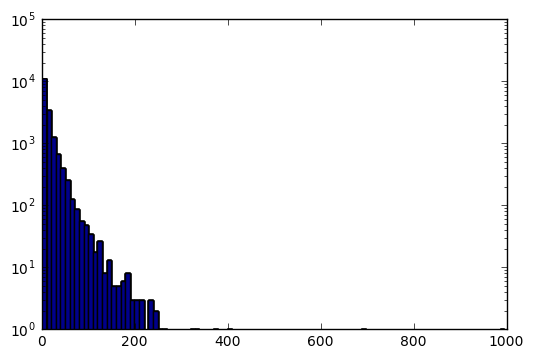

In [78]:
plt.hist(list(n_phosphosites.values()), bins=100,log=True, color="darkblue")
plt.show()

In [64]:
max(n_phosphosites.values())

995

In [66]:
list(n_phosphosites.keys())[list(n_phosphosites.values()).index(995)]

'TTN'

In [81]:
top_mutant_genes = [i[0] for i in sorted_by_value[0:100]]

In [87]:
psites_in_top_mutants = []
for i in top_mutant_genes:
    psites_in_top_mutants.append(n_phosphosites.get(i))

In [86]:
list(n_phosphosites.values()).count(1)

1648

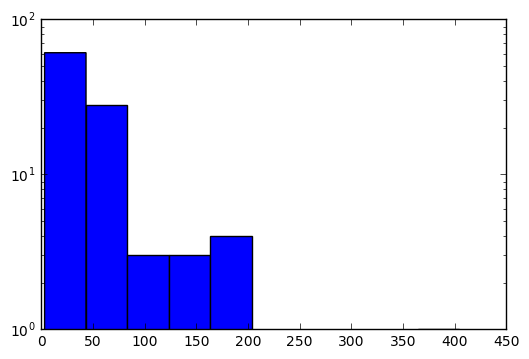

In [90]:
plt.hist(psites_in_top_mutants, log=True)
plt.show()

In [94]:
MPPs = [gene for gene in phosphogenes_distinct if not n_phosphosites[gene]==1]

In [95]:
len(MPPs)

15882

In [97]:
k=0
for gene in phosphogenes_distinct:
    if not gene in genes_distinct:
        k+=1

In [101]:
phosphogenes_distinct

{nan,
 'MISP',
 'ATPAF1',
 'TPPP',
 'CTNNA1',
 'ALKBH6',
 'EYA4',
 'MS4A10',
 'SLC45A4',
 'ZNF503',
 'SPEN',
 'ZNF789',
 'MRPS36',
 'MSTP109',
 'MUC2',
 'LMNTD1',
 'NEO1',
 'CLEC12B',
 'CORO1C',
 'AOAH',
 'KLF1',
 'HGC6.3',
 'NATD1',
 'KRT33B',
 'VOPP1',
 'LYSMD4',
 'DAPK1',
 'TMEM115',
 'TRIM31',
 'PKDREJ',
 'NT5DC2',
 'CPM',
 'PEAK1',
 'SUPV3L1',
 'PKIG',
 'CNDP2',
 'INTS1',
 'HTR3A',
 'MKLN1',
 'EIF3K',
 'MIA',
 'MUC20',
 'ZNF804A',
 'RPS13',
 'IGFBP2',
 'PCDH11X',
 'PLET1',
 'KLHL28',
 'DDI2',
 'AUTS2',
 'DRG1',
 'LIMS1',
 'SSBP4',
 'HGD',
 'MT1H',
 'OAT',
 'ABHD8',
 'TMEM179',
 'NKX2-6',
 'LRFN5',
 'KLF8',
 'PLOD3',
 'TBCE',
 'STEAP1B',
 'AGTRAP',
 'C17orf78',
 'GOT2',
 'EFCAB11',
 'XPO1',
 'NLRP6',
 'DLGAP2',
 'MAP2K7',
 'CLTCL1',
 'KCNJ12',
 'FUZ',
 'GSTT2B',
 'KIAA1755',
 'LZTS2',
 'SLC11A2',
 'SPRED2',
 'KCTD19',
 'ITPRIPL2',
 'ZNF682',
 'CEBPB',
 'MAN2A1',
 'TMEM132D',
 'PLA2G12A',
 'RGN',
 'ANO3',
 'CFAP161',
 'CEACAM19',
 'KLK13',
 'NFAT5',
 'TRH',
 'TYMS',
 'UFL1',
 'ZFY',

In [110]:
for gene in phosphogenes_distinct:
    if not gene in genes_distinct:
        gene_frequencies[gene]=0

for gene in genes_distinct:
    if not gene in phosphogenes_distinct:
        n_phosphosites[gene]=0

In [114]:
total_genes = genes_distinct.union(phosphogenes_distinct)

# p53 analysis

In [78]:
#extract the phosphorylation sites on p53
p53_filter = [i for i in range(np.shape(human_phosphosites)[0]) if human_phosphosites[i,0]=="TP53"]
p53_phosphosites = list(human_phosphosites[p53_filter,4])

In [79]:
p53_phosphosites

['S6-p',
 'S9-p',
 'S15-p',
 'T18-p',
 'S20-p',
 'S33-p',
 'S37-p',
 'S46-p',
 'T55-p',
 'T81-p',
 'S99-p',
 'S106-p',
 'Y126-p',
 'S149-p',
 'T150-p',
 'T155-p',
 'S183-p',
 'T211-p',
 'S215-p',
 'Y220-p',
 'R249-p',
 'S269-p',
 'T284-p',
 'T304-p',
 'T312-p',
 'S313-p',
 'S314-p',
 'S315-p',
 'Y327-p',
 'S362-p',
 'S366-p',
 'S371-p',
 'S376-p',
 'T377-p',
 'S378-p',
 'T387-p',
 'S392-p']

In [16]:
#keep only amino acid point substitutions
row_filter = [i for i in range(np.shape(data)[0]) if data[i,19]=='Substitution - Missense']
filtered_data = data[row_filter,:]

In [52]:
#look specifically at p53 point mutations
p53_filter = [i for i in range(np.shape(filtered_data)[0]) if filtered_data[i,0]=="TP53"]
p53_data = filtered_data[p53_filter,:]

In [64]:
p53_mutcounts = []
p53_WT = {}
p53_FATHMM = {}
for i in range(np.shape(p53_data)[0]):
    mutation = p53_data[i,18]
    match = re.search(r'p\.([A-Z])(\d+)[^\d]', mutation)
    if match:
        match = match.groups()
        p53_WT[match[1]] = match[0]
        p53_mutcounts.append(match[1])
        if match[1] in p53_FATHMM:
            p53_FATHMM[match[1]].append(p53_data[i,28])
        else:
            p53_FATHMM[match[1]] = [p53_data[i,28]]

In [3]:
p53_mutations = open("p53_mutations.csv",'w')
p53_mutations.write("Position\tWild type amino acid\tNumber of mutations\tFATHMM score\tIs phosphorylated?\n")
for num in p53_WT:
    fathmm = np.mean(p53_FATHMM[num])
    p53_mutations.write("{0}\t{1}\t{2}\t{3}\n".format(num,p53_WT[num],p53_mutcounts.count(num), fathmm))
p53_mutations.close()

NameError: name 'p53_WT' is not defined

Generate a list of all possible mutations to feed into PolyPhen2.

In [19]:
p53_sequence = """MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD"""

In [9]:
len(p53_sequence)

393

In [6]:
amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

In [11]:
k = 1
all_p53_mutations = open("all_p53_mutations.txt","w")
for residue in p53_sequence:
    for amino_acid in amino_acids:
        if not amino_acid == residue:
            all_p53_mutations.write("P04637 {0} {1} {2}\n".format(k,residue,amino_acid))
    k+=1
all_p53_mutations.close()

In [74]:
p53_polyphen_scores = pd.read_csv("p53_polyphen_scores.txt",sep="\t").iloc[:,:].values

In [18]:
np.shape(p53_polyphen_scores)[0]

7467

In [5]:
mean_scores = [np.mean(list(p53_polyphen_scores[19*i:19*(i+1),10])) for i in range(393)]

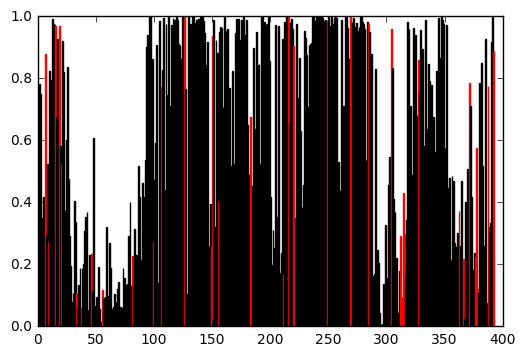

In [33]:
x = list(range(393))
plt.bar(x,mean_scores, color=colours, edgecolor=colours)
plt.show()

In [40]:
colours = ['red' if i+1 in p53_phospho_indices else 'black' for i in range(393)]

In [41]:
for i in range(393):
    if colours[i]=="black" and any(j in p53_phospho_indices for j in range(i-2,i+4)):
        colours[i]="green"

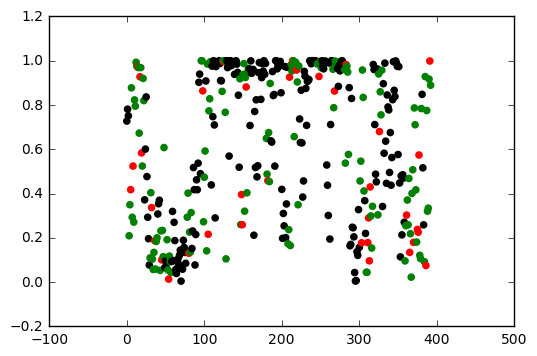

In [42]:
x = list(range(393))
plt.scatter(x,mean_scores, color=colours)
plt.show()

In [80]:
#extract the numerical positions of the p53 phosphosites
p53_phospho_indices = [int(re.search("[A-Z](\d+)-",site).group(1)) for site in p53_phosphosites]

In [3]:
#import the clinvar data
clinvar = pd.read_csv("variant_summary.txt",low_memory=False,sep="\t").iloc[:,:].values

In [6]:
p53_filter = [i for i in range(np.shape(clinvar)[0]) if clinvar[i,4]=="TP53"]
p53_clinvar = clinvar[p53_filter,:]

In [50]:
#get rid of everything that isn't an amino acid point mutation.
missense_filter = [i for i in range(np.shape(p53_clinvar)[0]) if re.search("\(p\.[A-Z][a-z]{2}[\d]+[A-Z][a-z]{2}", p53_clinvar[i,2]) and not "Ter" in p53_clinvar[i,2]]
p53_clinvar_missense = p53_clinvar[missense_filter,:]

In [31]:
#we should filter out any clinvar substitutions where the WT amino acid doesn't match the reference.
aa_123 = {"A":"Ala","C":"Cys","D":"Asp","E":"Glu","F":"Phe","G":"Gly","H":"His","I":"Ile","K":"Lys","L":"Leu","M":"Met","N":"Asn","P":"Pro","Q":"Gln","R":"Arg","S":"Ser","T":"Thr","V":"Val","W":"Trp","Y":"Tyr"}
aa_321 = {aa_123[i]:i for i in aa_123}

In [57]:
refmatch = []
for i in range(np.shape(p53_clinvar_missense)[0]):
    (wt,pos,sub) = re.search("\(p\.([A-Z][a-z]{2})([\d]+)([A-Z][a-z]{2})",p53_clinvar_missense[i,2]).groups()
    if aa_321[wt] == p53_sequence[int(pos)-1]:
        refmatch.append(i)
p53_clinvar_refmatch = p53_clinvar_missense[refmatch,:]

In [63]:
#entries are duplicated using reference genomes GRCh37 and GRCh38. Where both match the reference sequence, keep only GRCh37.
rmdupl = [i+1 for i in range(np.shape(p53_clinvar_refmatch)[0]-1) if p53_clinvar_refmatch[i,2]==p53_clinvar_refmatch[i+1,2]]
filter = [i for i in range(np.shape(p53_clinvar_refmatch)[0]) if not i in rmdupl]
p53_clinvar_refmatch_nd = p53_clinvar_refmatch[filter]

These conditions bring us to 794 point mutations.

In [67]:
np.shape(p53_clinvar_refmatch_nd)

(794, 31)

Now need to write a script to look up each of these mutations in the PolyPhen scores file and compare the scores to the true pathogenicity.

In [ ]:
p53_eval = open("p53_prediction_evaluation.csv","w")
p53_eval.write("Position\tWild type\tPhosphorylated?\tSubstitution\tPolyphen prediction\tPolyphen score\tClinical significance\n")
for i in range(np.shape(p53_clinvar_refmatch_nd)[0]):
    (wt,pos,sub) = re.search("\(p\.([A-Z][a-z]{2})([\d]+)([A-Z][a-z]{2})",p53_clinvar_refmatch_nd[i,2]).groups()
    for j in range(19*len(p53_sequence)):
        if p53_polyphen_scores[j,1]==int(pos) and p53_polyphen_scores[j,2]=="    "+aa_321[wt] and p53_polyphen_scores[j,3]=="    "+aa_321[sub]:
            ref=j
            break
    p53_eval.write("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\n".format(pos,wt,int(pos) in p53_phospho_indices,sub,p53_polyphen_scores[ref,9],p53_polyphen_scores[ref,10],p53_clinvar_refmatch_nd[i,6]))
p53_eval.close()    

# import all PTM sites and map to COSMIC mutations

For each cancer type and each PTM type, we want to know if the mutations are enriched in (i) PTM sites and (ii) adjacent sites.

In [6]:
phospho_data = pd.read_csv("PhosphoSitePlus/Phosphorylation_site_dataset", sep="\t", low_memory=False).iloc[:,:].values
methyl_data = pd.read_csv("PhosphoSitePlus/Methylation_site_dataset", sep="\t", low_memory=False).iloc[:,:].values
sumoyl_data = pd.read_csv("PhosphoSitePlus/Sumoylation_site_dataset", sep="\t", low_memory=False).iloc[:,:].values
ubiq_data = pd.read_csv("PhosphoSitePlus/Ubiquitination_site_dataset", sep="\t", low_memory=False).iloc[:,:].values
acetyl_data = pd.read_csv("PhosphoSitePlus/Acetylation_site_dataset", sep="\t", low_memory=False).iloc[:,:].values

In [7]:
#before merging, add another column corresponding to modification type
phospho = np.hstack((phospho_data, np.zeros((phospho_data.shape[0], 1))))
phospho[:,14]="ph"

sumoyl = np.hstack((sumoyl_data, np.zeros((sumoyl_data.shape[0], 1))))
sumoyl[:,14]="su"

ubiq = np.hstack((ubiq_data, np.zeros((ubiq_data.shape[0], 1))))
ubiq[:,14]="ub"

acetyl = np.hstack((acetyl_data, np.zeros((acetyl_data.shape[0], 1))))
acetyl[:,14]="ac"

methyl = np.hstack((methyl_data, np.zeros((methyl_data.shape[0], 1))))
methyl[:,14]="me"

In [6]:
methyl = np.hstack((methyl_data, np.zeros((methyl_data.shape[0], 1))))
for i in range(methyl_data.shape[0]):
    nmet = re.search(".+-(m[1-3])",methyl_data[i,4])
    if nmet:
        methyl[i,14]=nmet.group(1)
    else:
        methyl[i,14]="m1" #some residues seem to have an undetermined number of methylations, annotated "me"

In [8]:
ptm_data = np.vstack((phospho, methyl, acetyl, sumoyl, ubiq))

In [9]:
#only keep human PTMs
human_filter = [i for i in range(ptm_data.shape[0]) if ptm_data[i,6]=="human"]
ptm_human = ptm_data[human_filter,:]

In [10]:
#format the residue specifications.
ptm_human_formatted = np.hstack((ptm_human, np.zeros((ptm_human.shape[0],1))))
for i in range(ptm_human.shape[0]):
    residue = re.search("^([A-Z])(\d+)-.+",ptm_human[i,4])
    ptm_human_formatted[i,4] = residue.group(2)
    ptm_human_formatted[i,-1] = residue.group(1) #keep hold of the amino acid to double-check match.

In [8]:
#similarly manipulate the COSMIC dataset
failures = []
stratified_data_formatted = np.hstack((data_stratified, np.zeros((data_stratified.shape[0],2))))
for i in range(data_stratified.shape[0]):
    mutation = re.search("p\.([A-Z])([\d]+)([A-Z])", data_stratified[i,10])
    try:
        stratified_data_formatted[i,10] = mutation.group(2)
        stratified_data_formatted[i,15] = mutation.group(1)
        stratified_data_formatted[i,16] = mutation.group(3)
    except AttributeError:
        failures.append(i)
stratified_data_formatted = np.delete(stratified_data_formatted,failures,0)

In [9]:
adj = 7

In [10]:
mutation_ptm_data = np.hstack((stratified_data_formatted, np.zeros((stratified_data_formatted.shape[0],2*adj+1))))

In [11]:
#look at only phosphorylations for the time being.
phospho_filter = [i for i in range(ptm_human_formatted.shape[0]) if ptm_human_formatted[i,-2]=="ph"]
phospho_data_formatted = ptm_human_formatted[phospho_filter,:]

In [10]:
phospho_data_formatted

array([['YWHAB', '14-3-3 beta', 'P31946', ..., nan, 'ph', 'T'],
       ['YWHAB', '14-3-3 beta', 'P31946', ..., nan, 'ph', 'S'],
       ['YWHAB', '14-3-3 beta', 'P31946', ..., nan, 'ph', 'Y'],
       ...,
       ['ZZZ3', 'ZZZ3', 'Q8IYH5', ..., nan, 'ph', 'Y'],
       ['ZZZ3', 'ZZZ3', 'Q8IYH5', ..., nan, 'ph', 'S'],
       ['ZZZ3', 'ZZZ3', 'Q8IYH5', ..., nan, 'ph', 'S']], dtype=object)

In [12]:
gene_phospho = {}
for gene in gene_set:
    gene_phospho[gene] = []
for i in range(phospho_data_formatted.shape[0]):
    if phospho_data_formatted[i,0] in gene_set:
        gene_phospho[phospho_data_formatted[i,0]].append(int(phospho_data_formatted[i,4]))

In [11]:
for i in range(mutation_ptm_data.shape[0]):
    gene = mutation_ptm_data[i,0]
    residue = mutation_ptm_data[i,10]
    for j in range(1,2*adj+2):
        mutation_ptm_data[i,-j] = 1 if int(residue)-j+adj+1 in gene_phospho[gene] else 0

In [76]:
mutation_ptm_data

array([['MYO9B', 6474, '1781825', ..., 0, 0, 0],
       ['ENSG00000167281', 984, '1783399', ..., 0, 0, 0],
       ['SLC18A3', 1599, '1783399', ..., 0, 0, 0],
       ...,
       ['LHX4', 1173, '2185985', ..., 0, 0, 0],
       ['PRSS3', 915, '2292383', ..., 0, 0, 0],
       ['CDC42BPG', 4656, '2013599', ..., 0, 0, 0]], dtype=object)

In [12]:
np.savetxt("mutation_phosphorylations.csv",mutation_ptm_data,delimiter=",",fmt="%s")

Yay! Now to test for enrichment.

In [13]:
gene_lengths = {gene:0 for gene in gene_set}
for i in range(mutation_ptm_data.shape[0]):
    gene = gene_names[i]
    if mutation_ptm_data[i,1] > gene_lengths[gene]: #find the full length genes - or failing that the longest isoforms.
        gene_lengths[gene] = mutation_ptm_data[i,1]

In [14]:
total_residues = int(sum(gene_lengths[gene] for gene in gene_set)/3)

In [15]:
total_residues

11222506

In [16]:
total_phosphorylations = sum(len(gene_phospho[gene]) for gene in gene_set)

In [42]:
total_phosphorylations

216597

In [44]:
mutation_ptm_data.shape[0]

282020

In [17]:
exp = mutation_ptm_data.shape[0]*total_phosphorylations/total_residues

In [45]:
exp

5443.052197076126

In [18]:
enrichments = np.zeros((2*adj+1,2))

In [26]:
phosphorylations = []
for j in range(1,2*adj+2):
    phosphorylations.append(sum(mutation_ptm_data[:,-j]))

In [20]:
lower = stats.hypergeom.ppf(0.025,total_residues, total_phosphorylations, mutation_ptm_data.shape[0])

In [21]:
upper = stats.hypergeom.ppf(0.975,total_residues, total_phosphorylations, mutation_ptm_data.shape[0])

Text(0,0.5,'Number of mutations')

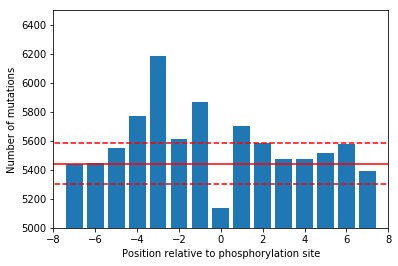

In [34]:
plt.bar(list(range(-adj,adj+1)),phosphorylations)
plt.xlim(-8,8)
plt.ylim(5000,6500)
plt.hlines([lower,upper,exp],xmin=-11,xmax=11,color="red", linestyles=['dashed','dashed','solid'])
plt.xlabel("Position relative to phosphorylation site")
plt.ylabel("Number of mutations")

In [36]:
[i/exp for i in phosphorylations]

[0.9996229694293162,
 1.0007252921303962,
 1.020199659849475,
 1.0600669975385324,
 1.1368621457137673,
 1.0314066073104542,
 1.077704160755811,
 0.9432207912240598,
 1.047574006926293,
 1.0262624347054143,
 1.0062369056357958,
 1.0056857442852558,
 1.0137694440931753,
 1.0244252302036145,
 0.9900695060199568]

In [28]:
len(phosphorylations)

15

In [29]:
phosphorylations

[5441,
 5447,
 5553,
 5770,
 6188,
 5614,
 5866,
 5134,
 5702,
 5586,
 5477,
 5474,
 5518,
 5576,
 5389]

In [33]:
phosphorylations.reverse()

In [31]:
phosphorylations

[5389,
 5576,
 5518,
 5474,
 5477,
 5586,
 5702,
 5134,
 5866,
 5614,
 6188,
 5770,
 5553,
 5447,
 5441]

In [178]:
phosphorylations[12]

5586

In [185]:
lower

5302.0

Need to calculate p-values and do an FDR adjustment.

In [37]:
pvals = []
for p in phosphorylations:
    cdf = stats.hypergeom.cdf(p,total_residues, total_phosphorylations, mutation_ptm_data.shape[0])
    if cdf>0.5:
        pvals.append(2*(1-cdf))
    else:
        pvals.append(2*cdf) # two-tailed test

In [38]:
from statsmodels.stats import multitest

In [39]:
pval_adj = multitest.fdrcorrection(pvals,alpha=0.05)

In [40]:
pvals

[0.9845153245100773,
 0.9491626471997909,
 0.12644647476116533,
 6.855207206779568e-06,
 2.419330646930007e-08,
 0.01793252454806371,
 3.075937859975397e-08,
 1.598365438003237e-05,
 0.0003544283870868803,
 0.047437323644715645,
 0.6318280687362787,
 0.6616412035850248,
 0.295701864562101,
 0.06505840930079976,
 0.45844238852803804]

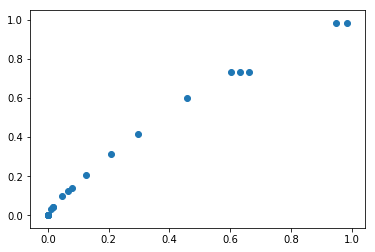

In [200]:
plt.scatter(pvals,pval_adj[1])

In [102]:
k=0
for gene in top_100_genes:
     if gene_nphospho[gene]>1:
            k+=1

In [103]:
k

79

In [104]:
k=0
for gene in gene_set:
    if gene_nphospho[gene]>1:
            k+=1

In [106]:
k/len(gene_set)

0.7482131254061078

In [130]:
for i in range(1,2*adj+2):
    a = sum((mutation_ptm_data[:,i-2*adj-2]))
    b = mutation_ptm_data.shape[0]-a
    c = total_phosphorylations - a
    d = total_residues - a
    (enrichments[i-1,0],enrichments[i-1,1]) = stats.fisher_exact([[a,b],[c,d]])

In [131]:
enrichments

array([[1.03461369e+00, 1.49596211e-02],
       [1.07217069e+00, 4.73748982e-07],
       [1.06050970e+00, 2.33490435e-05],
       [1.05167082e+00, 2.92619252e-04],
       [1.05227327e+00, 2.48135795e-04],
       [1.07418232e+00, 2.32665683e-07],
       [1.09754133e+00, 1.28603371e-11],
       [9.83584328e-01, 2.48899830e-01],
       [1.13064189e+00, 1.99396560e-19],
       [1.07981664e+00, 2.69403615e-08],
       [1.19589117e+00, 1.02046422e-40],
       [1.11125517e+00, 1.31610567e-14],
       [1.06754518e+00, 2.37839890e-06],
       [1.04625010e+00, 1.19610886e-03],
       [1.04504582e+00, 1.56723804e-03]])

In [105]:
y = total_phosphorylations/total_residues

In [106]:
y

0.019300234724757555

In [107]:
y*data_stratified.shape[0]

5443.052197076126

I did this enrichment the wrong way... just need to see what proportion of mutations are on or near phosphosites and whether it's enriched over the whole proteome...

This means we really need to look at mutations in the vicinity of phosphosites.

In [90]:
gene_nphospho = {gene:len(gene_phospho[gene]) for gene in gene_phospho}

In [91]:
sum(gene_nphospho.values())

216597

In [98]:
total_residues = int(sum(mutation_ptm_data[:,1])/3)

In [99]:
total_residues

412107628

In [205]:
gene_counts = {gene:0 for gene in gene_set}
for gene in gene_names:
    gene_counts[gene] += 1

In [47]:
gene_counts['TP53'] #average sample contains 1.3 TP53 mutations.

1293

In [211]:
gene_mutation_density = {gene:gene_counts[gene]/gene_lengths[gene] for gene in gene_set}

In [207]:
gene_mutation_density['TP53'] # so the average nucleotide in TP53 CDS is mutated in 0.1% of samples.

1.7047377326565143

In [49]:
genes_ordered = sorted(gene_mutation_density.items(), reverse=True, key=lambda kv: kv[1])
genes_ordered = [i[0] for i in genes_ordered]

In [51]:
top_100_genes = genes_ordered[:100]

In [52]:
top_100_genes

['TP53',
 'KRAS',
 'CDKN2A',
 'FRG1B',
 'ADRA1A',
 'PIK3CA',
 'FBXW7',
 'RGS7',
 'LRRTM4',
 'HRAS',
 'PTPRD',
 'RUNX1T1',
 'PCDH15',
 'C20orf80',
 'ZIC4',
 'PRSS3',
 'MAX',
 'COX6C',
 'RIMS2',
 'MAD2L2',
 'NTM',
 'CAPSL',
 'UBBP4',
 'GABRB3',
 'TRIM48',
 'PID1',
 'NRXN1',
 'PSG1',
 'RBFOX1',
 'CACNB2',
 'FRG1',
 'OPRM1',
 'DPP10',
 'NRAS',
 'HIST1H2BK',
 'MS4A4A',
 'BCL2',
 'CACNA1E',
 'PDE1A',
 'COL13A1',
 'CACNA1C',
 'CTNNA2',
 'CSMD1',
 'PCDHA5',
 'RBP1',
 'HNF4G',
 'IL37',
 'PCDHA10',
 'ZNF208',
 'AQP7',
 'SPOCK3',
 'NTNG1',
 'COL11A1',
 'LOC441526',
 'MYOCD',
 'PDHA1',
 'HTR4',
 'SOCS1',
 'CTCFL',
 'BDNF',
 'PCLO',
 'PRB2',
 'COL9A1',
 'DLG2',
 'KLHL4',
 'OR2L13',
 'BRAF',
 'CD1E',
 'PCDHA3',
 'CACNB4',
 'CD209',
 'PLEC',
 'CASP8',
 'SPHKAP',
 'SSX3',
 'TPO',
 'CDH18',
 'C10orf113',
 'KCNC2',
 'GRM8',
 'DCLK1',
 'COL21A1',
 'SGIP1',
 'PRB3',
 'SCN1A',
 'NRSN1',
 'MS4A6A',
 'ZNF595',
 'CSMD3',
 'LPHN2',
 'CNTN5',
 'FGFR2',
 'RAC1',
 'PRB4',
 'DTNA',
 'HHLA2',
 'CFHR5',
 'GRIA4',
 '

# so instead of stratifying we gonna take an equal number of each cancer type

In [37]:
random_sample =[]
for i in tumour_types:
    all_tumours = [tumour_index[j] for j in range(len(tumour_index)) if tumour_type[j]==i]
    sample = random.sample(all_tumours,100)
    for k in sample:
        random_sample.append(wgs_data_missense[k,3])

In [40]:
sample_filter = [i for i in range(wgs_data_missense.shape[0]) if wgs_data_missense[i,3] in random_sample]
data_sampled = wgs_data_missense[sample_filter,:]

In [202]:
list(gene_nphospho.values()).count(1)

1301

In [201]:
list(gene_nphospho.values()).count(0)

3720

In [203]:
gene_nphospho = {gene:len(gene_phospho[gene]) for gene in gene_phospho}

In [212]:
nphospho_list = []
mutdens_list = []
for gene in gene_set:
    nphospho_list.append(gene_nphospho[gene])
    mutdens_list.append(gene_mutation_density[gene])

In [216]:
stats.spearmanr(nphospho_list,mutdens_list)

SpearmanrResult(correlation=0.08916629707033978, pvalue=3.616223914387962e-35)

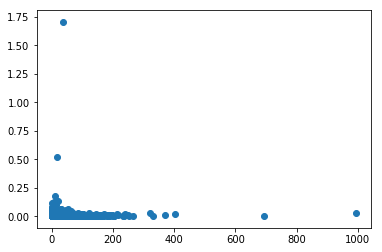

In [217]:
plt.scatter(nphospho_list,mutdens_list)

Find the top 100 for each cancer type??

In [57]:
from scipy import stats

In [79]:
mean = np.mean(list(gene_nphospho.values()))

In [94]:
mean

11.608078839072991

In [75]:
np.mean(list(gene_nphospho[gene] for gene in top_100_genes))

14.69

Could this happen by chance? Work out the sampling distribution of the mean when you pick any 100 (large enough N to assume normality).

In [82]:
stderr = np.std(list(gene_nphospho.values()))/10
confint = (mean-1.96*stderr,mean+1.96*stderr)

In [81]:
confint

(15.682790857785196, 7.533366820360787)

14.69 lies within the 95% sampling interval, so there's a >5% chance of observing this effect from a purely random sample. Therefore not actually significant.

(array([1.5368e+04, 2.0000e+03, 6.4800e+02, 2.1700e+02, 1.0000e+02,
        4.5000e+01, 3.3000e+01, 1.8000e+01, 1.1000e+01, 1.0000e+01,
        5.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. , 218.9, 238.8, 258.7, 278.6, 298.5, 318.4, 338.3,
        358.2, 378.1, 398. , 417.9, 437.8, 457.7, 477.6, 497.5, 517.4,
        537.3, 557.2, 577.1, 597. , 616.9, 636.8, 656.7, 676.6, 696.5,
        716.4, 736.3, 756.2, 776.1

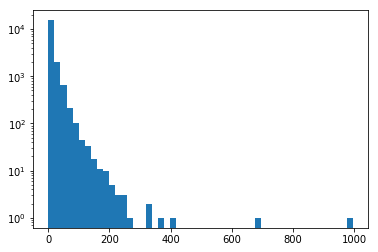

In [71]:
plt.hist(list(gene_nphospho.values()),log="x", bins=50)

(array([74., 19.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,  16.05,  32.1 ,  48.15,  64.2 ,  80.25,  96.3 , 112.35,
        128.4 , 144.45, 160.5 , 176.55, 192.6 , 208.65, 224.7 , 240.75,
        256.8 , 272.85, 288.9 , 304.95, 321.  ]),
 <a list of 20 Patch objects>)

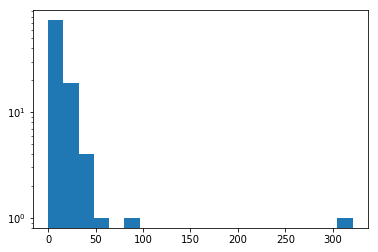

In [77]:
plt.hist(list(gene_nphospho[gene] for gene in top_100_genes),log="x", bins=20)

In [92]:
max(gene_nphospho[gene] for gene in top_100_genes)

321

For each mutation in these top 100 proteins, we will compare the performance of Polyphen, SIFT, FATHMM-XF and CADD. NB not all of them will have "true" data available.

In [1]:
import urllib

In [4]:
gene_names = list(wgs_data_formatted[:,0])

In [87]:
url = 'https://www.uniprot.org/uploadlists/'

params = {
'from':'GENENAME',
'to':'ID',
'format':'tab',
'organism':'Human',
'query':" ".join(gene_set)
}

data = urllib.parse.urlencode(params).encode("utf-8")
request = urllib.request.Request(url, data)
contact = "stephencole14@gmail.com" # Please set a contact email address here to help us debug in case of problems (see https://www.uniprot.org/help/privacy).
request.add_header('User-Agent', 'Python %s' % contact)
response = urllib.request.urlopen(request)

result_file = open("cosmic_conversion_result.txt","w")
result_file.write((response.read()).decode("utf-8")) #nb response can only be read once
result_file.close()

HTTPError: HTTP Error 400: 

The API doesn't seem to work because there are hundreds of different identifiers. Other option is to download the database of identifiers.

In [2]:
uniprot_IDs = pd.read_csv("HUMAN_9606_idmapping.dat", sep="\t", low_memory=False, dtype=str).iloc[:,:].values

In [3]:
filter1 = [i for i in range(uniprot_IDs.shape[0]) if uniprot_IDs[i,1]=="Gene_Name"]
uniprot_IDs_named = uniprot_IDs[filter1,:]

In [4]:
p53_filter = [i for i in range(uniprot_IDs_named.shape[0]) if uniprot_IDs_named[i,2]=="TP53"]
uniprot_IDs_p53 = uniprot_IDs_named[p53_filter,:]

In [5]:
uniprot_IDs_p53

array([['P04637', 'Gene_Name', 'TP53'],
       ['A0A346XM22', 'Gene_Name', 'TP53'],
       ['S5LJ61', 'Gene_Name', 'TP53'],
       ['A4GW67', 'Gene_Name', 'TP53'],
       ['A0A346XLW0', 'Gene_Name', 'TP53'],
       ['A0A218MJD5', 'Gene_Name', 'TP53'],
       ['S5LQX7', 'Gene_Name', 'TP53'],
       ['A0A346XLP2', 'Gene_Name', 'TP53'],
       ['A0A346XLX5', 'Gene_Name', 'TP53'],
       ['L0EPV7', 'Gene_Name', 'TP53'],
       ['A0A346XM28', 'Gene_Name', 'TP53'],
       ['L0EPY0', 'Gene_Name', 'TP53'],
       ['A4GWB5', 'Gene_Name', 'TP53'],
       ['A0A346XLX2', 'Gene_Name', 'TP53'],
       ['A0A346XLY3', 'Gene_Name', 'TP53'],
       ['A0A346XM50', 'Gene_Name', 'TP53'],
       ['A0A346XM49', 'Gene_Name', 'TP53'],
       ['L0EQP9', 'Gene_Name', 'TP53'],
       ['A0A346XLR1', 'Gene_Name', 'TP53'],
       ['A0A218MJF3', 'Gene_Name', 'TP53'],
       ['L0EQS1', 'Gene_Name', 'TP53'],
       ['Q1MSW9', 'Gene_Name', 'TP53'],
       ['K7PPA8', 'Gene_Name', 'TP53'],
       ['L0EQU5', 'Gene_Name', '

Just from this example we can see that there are 174 different human identifiers for p53 alone. We only want P04637. (which is the only one beginning with P...)
    Seems like the first one is generally the stable accession number, so we'll use this.

In [6]:
i = list(uniprot_IDs_named[:,2]).index('TP53')

In [7]:
uniprot_IDs_named[i,0]

'P04637'

# getting sequences for NetPhorest

In [6]:
import urllib

In [4]:
url = 'https://www.uniprot.org/uploadlists/'

params = {
'format':'fasta',
'organism':'Human',
'query':"accession:P04637",
'columns':['sequence']
}

data = urllib.parse.urlencode(params).encode("utf-8")
request = urllib.request.Request(url, data)
contact = "stephencole14@gmail.com" # Please set a contact email address here to help us debug in case of problems (see https://www.uniprot.org/help/privacy).
request.add_header('User-Agent', 'Python %s' % contact)
response = urllib.request.urlopen(request)

result_file = open("p53_fasta.txt","w")
result_file.write((response.read()).decode("utf-8")) #nb response can only be read once
result_file.close()

In [5]:
import pycurl

In [6]:
request = urllib.request.Request("https://www.uniprot.org/uniprot/P04637.fasta",data)

In [7]:
response = urllib.request.urlopen(request)

In [9]:
response.read()

b'>sp|P04637|P53_HUMAN Cellular tumor antigen p53 OS=Homo sapiens OX=9606 GN=TP53 PE=1 SV=4\nMEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGP\nDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAK\nSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHE\nRCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS\nSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELP\nPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG\nGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD\n'

In [11]:
urllib.request.urlopen(urllib.request.Request("https://www.uniprot.org/uniprot/P04637.fasta")).read()

b'>sp|P04637|P53_HUMAN Cellular tumor antigen p53 OS=Homo sapiens OX=9606 GN=TP53 PE=1 SV=4\nMEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGP\nDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAK\nSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHE\nRCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS\nSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELP\nPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG\nGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD\n'

In [39]:
def sequence(acc):
    fastafile = fasta(acc)
    pattern = re.search(r"\\n(.+)'",str(fastafile))
    seq = pattern.group(1)
    return seq.replace("\\n","")

In [40]:
sequence("P09341")

'MARAALSAAPSNPRLLRVALLLLLLVAAGRRAAGASVATELRCQCLQTLQGIHPKNIQSVNVKSPGPHCAQTEVIATLKNGRKACLNPASPIVKKIIEKMLNSDKSN'

In [3]:
def fasta(acc):
    url = "https://www.uniprot.org/uniprot/{0}.fasta".format(acc)
    return urllib.request.urlopen(urllib.request.Request(url)).read()

In [41]:
fasta("P09341")

b'>sp|P09341|GROA_HUMAN Growth-regulated alpha protein OS=Homo sapiens OX=9606 GN=CXCL1 PE=1 SV=1\nMARAALSAAPSNPRLLRVALLLLLLVAAGRRAAGASVATELRCQCLQTLQGIHPKNIQSV\nNVKSPGPHCAQTEVIATLKNGRKACLNPASPIVKKIIEKMLNSDKSN\n'

In [10]:
def fastasub(acc,pos,aa1,aa2, filename):
    outputf = open(filename,"w")
    fastafile = str(fasta(acc))
    start = fastafile.index("\\n")
    fastafile = fastafile.replace("\\n","")
    if fastafile[pos+start-1]==aa1:
        listseq = [c for c in fastafile] #convert string to list bc strings are immutable
        listseq[pos+start-1]=aa2
        listseq.insert(start,"\n")
        fastafile_sub = "".join(listseq)
        outputf.write(fastafile_sub)
        return fastafile_sub
    else:
        raise TypeError("input amino acid does not match accession")

In [12]:
fastasub("P09341",3,"R","T","test_substitution_fasta.txt")

"b'>sp|P09341|GROA_HUMAN Growth-regulated alpha protein OS=Homo sapiens OX=9606 GN=CXCL1 PE=1 SV=1\nMATAALSAAPSNPRLLRVALLLLLLVAAGRRAAGASVATELRCQCLQTLQGIHPKNIQSVNVKSPGPHCAQTEVIATLKNGRKACLNPASPIVKKIIEKMLNSDKSN'"

In [46]:
str(fasta("P09341")).index("\\n")

97

In [1]:
import subprocess

In [17]:
out = subprocess.Popen(['cat','p53_fasta.txt','|','./NetPhorest_human_2.1/netphorest'],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [44]:
import os
cmd = 'cat p53_fasta.txt | ./NetPhorest_human_2.1/netphorest'
returned_value = os.system(cmd)
print(returned_value)

255


In [38]:
out = subprocess.Popen(['pwd'],stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT, shell=True)

In [39]:
stdout,stderr = out.communicate()

In [40]:
stdout

b"'pwd' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"

In [31]:
out = subprocess.run(['wc', '-c', 'p53_fasta.txt'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [34]:
out = subprocess.call(['pwd'],stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [24]:
stdout,stderr = out.communicate()

In [25]:
print(stdout)

b"'wc' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"


In [22]:
os.listdir()

['.ipynb_checkpoints',
 '.Rhistory',
 'all_p53_mutations.txt',
 'awesome.pdf',
 'awesomeAll',
 'awesomeAll.zip',
 'biorxiv paper.pdf',
 'cancer_types.csv',
 'cancer_types.xls',
 'cdwm_lent.csv',
 'cdwm_scoring_sheets.txt',
 'cosmicdata',
 'cosmicdata_coding',
 'cosmicdata_WGS',
 'CosmicMutantExport.tsv',
 'CosmicMutantExport.tsv.gz',
 'cosmic_conversion_result.txt',
 'evmutation',
 'evo constraint.PDF',
 'evolution of phospho.pdf',
 'gene_names.txt',
 'Hiraeth_CHOP event rundown.pdf',
 'HUMAN_9606_idmapping.dat',
 'humvar',
 'ICGC_mutations.tsv',
 'lent cdwm template.txt',
 'mutation-ids-for-set-PCAWG.tsv',
 'mutation_phosphorylations.csv',
 'NetPhorest_human_2.1',
 'NetPhorest_human_2.1.zip',
 'P04637.fasta.txt',
 'p53 targeting.pdf',
 'p53_clinvar.txt',
 'p53_fasta.txt',
 'p53_fasta_curl.txt',
 'p53_mutational_spectrum_polyphen.txt',
 'p53_mutations.csv',
 'p53_polyphen_scores.txt',
 'p53_prediction_evaluation.csv',
 'papers',
 'PhosphoSitePlus',
 'polyphen-2.2.2',
 'polyphen-2.2.2r4

In [38]:
#turn dict to text file
gene_phospho_file = open("gene_phosphosites.txt","w")
for gene in gene_phospho:
    gene_phospho_file.write("{0}\t{1}\n".format(gene,gene_phospho[gene]))
gene_phospho_file.close()

In [2]:
#turn text file to dict
gene_phospho_file = open("gene_phosphosites.txt").readlines()
gene_phospho = {}
for gene in gene_phospho_file:
    pattern = re.match("(\S+)\t\[([^\t]*)\]",gene)
    sites = pattern.group(2)
    if sites:
        sites = sites.split(", ")
        sites = [int(n) for n in sites]
    else:
        sites = []
    gene_phospho[pattern.group(1)] = sites

In [3]:
gene_phospho

{'TRIM64C': [],
 'ZNF227': [174, 190, 343, 345, 347, 431, 459, 487, 543, 571, 627, 655, 767],
 'OR5AR1': [148],
 'C3orf58': [13, 92, 96, 183],
 'LOC441481': [],
 'TAS2R8': [43, 46, 49, 263, 301],
 'ATP6V1A': [117,
  125,
  136,
  145,
  148,
  153,
  160,
  309,
  316,
  384,
  454,
  457,
  464,
  465,
  528,
  579,
  599,
  601,
  614],
 'CCDC116': [278, 281, 285, 291, 386, 390, 564, 574],
 'MARVELD3': [46,
  47,
  93,
  113,
  123,
  156,
  163,
  166,
  167,
  177,
  264,
  291,
  341,
  404,
  407,
  409],
 'ZBTB5': [118,
  127,
  208,
  215,
  218,
  234,
  237,
  298,
  371,
  384,
  385,
  386,
  516,
  524,
  636,
  641],
 'RHBDD2': [21, 264, 276, 343, 417],
 'CTPS2': [12, 53, 189, 261, 277, 336, 378, 562, 564, 567, 568, 571, 574, 576],
 'EPS15L1': [30,
  46,
  49,
  74,
  106,
  107,
  108,
  113,
  171,
  229,
  235,
  238,
  239,
  241,
  244,
  246,
  247,
  250,
  251,
  253,
  255,
  259,
  295,
  355,
  362,
  366,
  371,
  372,
  374,
  377,
  390,
  402,
  418,
  434,

In [34]:
df.to_csv("gene_phosphosites.csv",sep="\t")

In [35]:
df2 = pd.read_csv("gene_phosphosites.csv",sep="\t", index_col=0)
gene_phospho2 = df2.to_dict(orient="index")

In [70]:
gene_set_file = open("all_genes.txt","w")
for gene in gene_set:
    gene_set_file.write(gene+"\n")
gene_set_file.close()


In [76]:
gene_set = set()
genes = open("all_genes.txt").readlines()
for gene in genes:
    gene_set.add(gene.replace("\n",""))
genes.close()

In [5]:
gene_phospho_file = open("gene_phosphosites.txt").readlines()
gene_phospho = {}
for gene in gene_phospho_file:
    pattern = re.match("(\S+)\t\[([^\t]*)\]",gene)
    sites = pattern.group(2)
    if sites:
        sites = sites.split(", ")
        sites = [int(n) for n in sites]
    else:
        sites = []
    gene_phospho[pattern.group(1)] = sites

In [7]:
gene_phospho['TP53']

[6,
 9,
 15,
 18,
 20,
 33,
 37,
 46,
 55,
 81,
 99,
 106,
 126,
 149,
 150,
 155,
 183,
 211,
 215,
 220,
 249,
 269,
 284,
 304,
 312,
 313,
 314,
 315,
 327,
 362,
 366,
 371,
 376,
 377,
 378,
 387,
 392]

In [28]:
url = 'http://protein.bio.unipd.it/ring/'

params = {
'organism':'Human',
'query':"119L"
}

data = urllib.parse.urlencode(params).encode("utf-8")
request = urllib.request.Request(url, data)
contact = "stephencole14@gmail.com" # Please set a contact email address here to help us debug in case of problems (see https://www.uniprot.org/help/privacy).
request.add_header('User-Agent', 'Python %s' % contact)
response = urllib.request.urlopen(request)

result_file = open("ring_test.txt","w")
result_file.write((response.read()).decode("utf-8")) #nb response can only be read once
result_file.close()

C:\Users\steph\Documents\work\partiii\Project


In [27]:
import urllib

In [50]:
import pickle